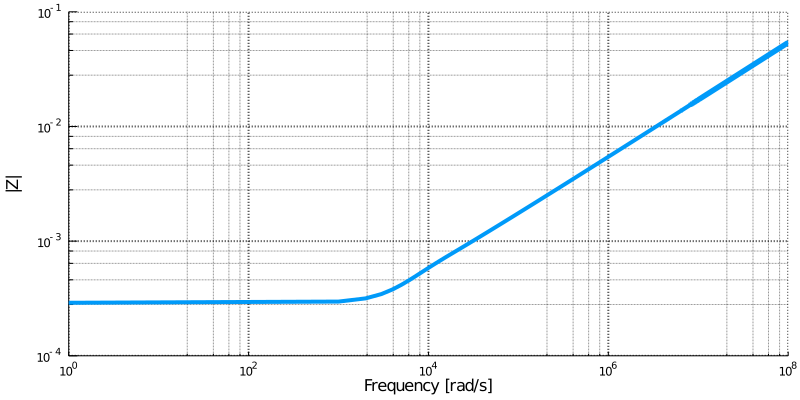

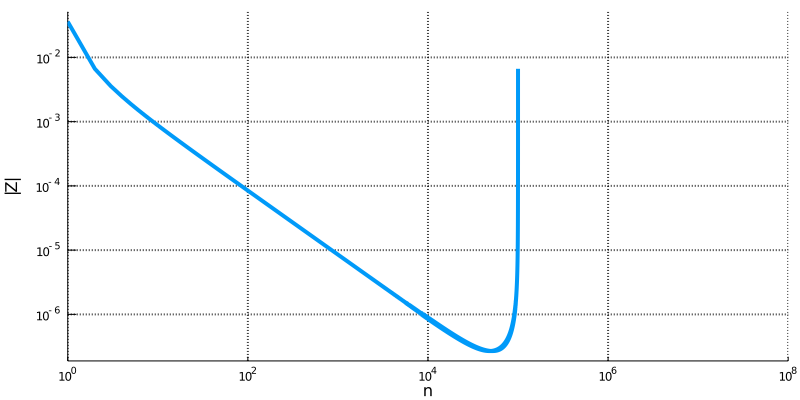

In [1]:
using Plots
using SpecialFunctions
using FFTW

#physics constants and input data
μ0 = 4*π*1e-7
σw = 3.5e7
rw = 5.6/1000
ω = collect(1:1000.0:1.0e8) #define frequency range (1 to 10^8 in increment of 1000 rad/s)

#initialize arrays
γi = zeros(ComplexF64,size(ω)[1])
Zi = copy(γi)

#Evaluate frequency domain function
γi .= sqrt.(1im.*ω*μ0*σw)
Zi .= (1/(2*π*σw*rw)) .* γi .* besseli.(0,γi*rw)./(besseli.(1,γi*rw))

fig1 = plot(ω,abs.(Zi),xaxis=:log, yaxis=:log,legend=false,lw=4)
plot!(xlabel=("Frequency [rad/s]"),ylabel=("|Z|"),fg=:black,bg=:white)
plot!(gridcolor=:black,gridwidth=2,gridstyle=:dot,gopacity = 0.8)
plot!(minorgrid=true,minorgridcolor=:black,minorgridlinewidth=1,minorgridstyle=:dot,minorgridalpha = 0.75)
plot!(xlim = (1e0,1e8),ylim = (1e-4,1e-1),size=(800,400))

#Inverse FFT
Zitime1 = ifft(Zi)

fig2 = plot(abs.(Zitime1),xlims=(1,1e8),xaxis=:log, yaxis=:log,legend=false,lw=4)
plot!(gridcolor=:black,gridwidth=2,gridstyle=:dot,gopacity = 0.8)
plot!(xlabel=("n"),ylabel=("|Z|"),fg=:black,bg=:white,size=(800,400))

display(fig1)
display(fig2)